<a href="https://colab.research.google.com/github/nrsmadmrl/proje/blob/main/projecalismasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.9 MB/s eta 0:00:00


In [2]:
# Temel
import numpy as np
import pandas as pd

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
import warnings
warnings.filterwarnings("ignore")


In [3]:
from google.colab import files
uploaded = files.upload()


Saving DOWNLOAD-qWLdRiPB8YlM4SYWvX3KiBrVNSpBaB3a-hhrFdJEy7Q_eq_.csv to DOWNLOAD-qWLdRiPB8YlM4SYWvX3KiBrVNSpBaB3a-hhrFdJEy7Q_eq_.csv


In [4]:
df = pd.read_csv("DOWNLOAD-qWLdRiPB8YlM4SYWvX3KiBrVNSpBaB3a-hhrFdJEy7Q_eq_.csv", sep=';')

In [5]:
df.shape

(7022, 48)

In [6]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL66775,NaN,NaN,318.48,0.0,4.00,4,C[C@]12C[C@@H](S)C(=O)C=C1CCC1C2CC[C@]2(C)C(=O...,Activity remaning,'=',...,CHEMBL1124325,1,Scientific Literature,J Med Chem,1989,NaN,NaN,NaN,NaN,75.000
1,CHEMBL176098,NaN,NaN,251.33,0.0,3.97,14,COc1ccc2c(c1)CCC/C2=C/c1cccnc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,4.000
2,CHEMBL176886,NaN,NaN,251.33,0.0,3.97,17,CCOc1ccc2c(c1)CC/C2=C/c1cccnc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,7.680
3,CHEMBL175962,NaN,NaN,207.28,0.0,3.57,26,C(=C1\CCc2ccccc21)\c1ccncc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,6.700
4,CHEMBL366773,NaN,NaN,286.17,0.0,4.33,33,Brc1ccc2c(c1)CC/C2=C\c1ccncc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,2.469


In [7]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [8]:
df = df[["Smiles", "Standard Type", "Standard Value", "Standard Units"]].copy() #Sadece ihtiyacımız olan kolonları tuttum

In [9]:
df = df[df["Standard Type"] == "IC50"] #Sadece IC50 ölçümleri

In [10]:
df = df.dropna(subset=["Smiles", "Standard Value", "Standard Units"]) #Eksik değerleri temizledim

In [11]:
df = df[df["Standard Units"] == "nM"] #Birim filtresi (şimdilik sadece nM)

In [12]:
df["Standard Value"] = pd.to_numeric(df["Standard Value"], errors="coerce") #Sayıya çevir

df = df.dropna(subset=["Standard Value"])


In [13]:
df.shape


(4285, 4)

In [14]:
df["Standard Value"].describe()


,Standard Value
count,4.285000e+03
mean,1.466310e+10
std,5.942559e+11
min,0.000000e+00
25%,1.100800e+02
50%,1.010000e+03
75%,6.998420e+03
max,3.388442e+13


In [15]:
df["IC50_M"] = df["Standard Value"] * 1e-9
#pIC50 tanımı molar birim üzerinden yapılır.

In [16]:
df["pIC50"] = -np.log10(df["IC50_M"])
#pIC50 hesapla

In [17]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["pIC50"])
#Geçersiz değerleri temizle

In [18]:
df["pIC50"].describe()


,pIC50
count,4284.000000
mean,6.052955
std,1.506779
min,-4.530000
25%,5.155000
50%,5.994840
75%,6.955815
max,17.899974


In [19]:
df = df[(df["pIC50"] >= 3) & (df["pIC50"] <= 11)]
#Mantıksız uçları YUMUŞAK temizle

In [20]:
df["pIC50"].describe()

,pIC50
count,4200.000000
mean,6.141250
std,1.319869
min,3.006123
25%,5.207990
50%,6.000000
75%,6.974694
max,11.000000


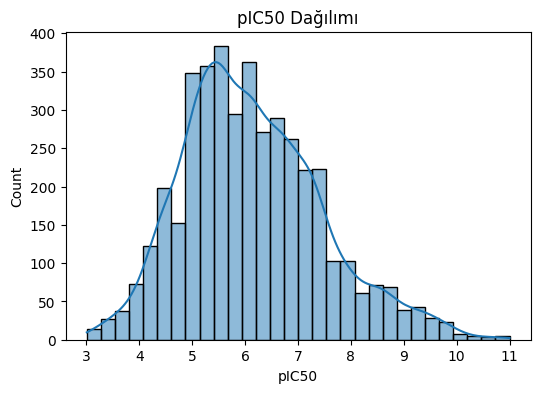

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df["pIC50"], bins=30, kde=True)
plt.xlabel("pIC50")
plt.title("pIC50 Dağılımı")
plt.show()


In [22]:
df = df.reset_index(drop=True)
df.shape


(4200, 6)

In [23]:
df["mol"] = df["Smiles"].apply(Chem.MolFromSmiles)
#Önce molekülleri RDKit nesnesine çeviriyoruz.

In [24]:
df = df[df["mol"].notnull()].copy()
#RDKit None döndürüyorsa → molekül geçersizdir.

In [25]:
df.shape


(4200, 7)

In [26]:
# Aynı SMILES birden fazla IC50 ölçümüne sahip olabilir.
# Akademik olarak kabul gören yöntem:

# Aynı molekül için pIC50 medyanı almak
df = (
    df
    .groupby("Smiles", as_index=False)
    .agg({
        "pIC50": "median",
        "mol": "first"
    })
)


In [27]:
df.shape

(3096, 3)

In [28]:
df.head()


,Smiles,pIC50,mol
0,Brc1cc(Br)c2oc(Cn3ccnc3)cc2c1,5.094000,<rdkit.Chem.rdchem.Mol object at 0x7e39db0d6f10>
1,Brc1ccc(-c2csc(-c3cccnc3)n2)cn1,5.130182,<rdkit.Chem.rdchem.Mol object at 0x7e39db1568f0>
2,Brc1ccc(-c2csc(-c3ccncc3)n2)cn1,5.571865,<rdkit.Chem.rdchem.Mol object at 0x7e39db0d40b0>
3,Brc1ccc(-c2nc(-c3cccnc3)cs2)cc1,5.101275,<rdkit.Chem.rdchem.Mol object at 0x7e39db100a50>
4,Brc1ccc(-c2nsc(-c3ccc(Br)cc3)n2)cc1,4.301030,<rdkit.Chem.rdchem.Mol object at 0x7e39db156a40>


AŞAMA 6 — Feature Engineering ve QSAR projelerinin en kritik teknik adımıdır.

Bu mesajda SADECE şunları yapacağız:

Morgan Fingerprint üretimi (baseline)

Model girdi matrisi X

Hedef vektörü y

Kontroller

In [29]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

morgan_gen = GetMorganGenerator(
    radius=2,
    fpSize=2048
)

def morgan_fp(mol):
    return morgan_gen.GetFingerprint(mol)

df["fingerprint"] = df["mol"].apply(morgan_fp)

#Morgan Fingerprint fonksiyonu

In [30]:
df["fingerprint"] = df["mol"].apply(morgan_fp)
#Fingerprint üret

In [31]:
X = np.array([np.array(fp) for fp in df["fingerprint"]])
y = df["pIC50"].values
#X ve y oluştur

In [32]:
X.shape, y.shape


((3096, 2048), (3096,))

In [33]:
np.isnan(X).sum(), np.isnan(y).sum()
#Bellek & NaN kontrolü

(np.int64(0), np.int64(0))

In [34]:
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train_r.shape, X_test_r.shape
#Bu split model geliştirme için kullanılmayacak, sadece kıyas için.


((2476, 2048), (620, 2048))

In [35]:
from rdkit.Chem.Scaffolds import MurckoScaffold

def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return MurckoScaffold.MurckoScaffoldSmiles(
        mol=mol,
        includeChirality=False
    )

df["scaffold"] = df["Smiles"].apply(get_scaffold)
df = df[df["scaffold"].notnull()].copy()
df = df.reset_index(drop=True)
#bu split final değerlendirme



In [36]:
from collections import defaultdict

scaffold_groups = defaultdict(list)

for idx, scaffold in enumerate(df["scaffold"]):
    scaffold_groups[scaffold].append(idx)
#scaffold’lara göre indeksleme

In [37]:
scaffolds_sorted = sorted(
    scaffold_groups.values(),
    key=lambda x: len(x),
    reverse=True
)

train_idx = []
test_idx = []

test_size = int(0.2 * len(df))

for scaffold in scaffolds_sorted:
    if len(test_idx) + len(scaffold) <= test_size:
        test_idx.extend(scaffold)
    else:
        train_idx.extend(scaffold)
#greedy scaffold split (%20 test)

In [38]:
X_train_s = X[train_idx]
X_test_s  = X[test_idx]
y_train_s = y[train_idx]
y_test_s  = y[test_idx]

X_train_s.shape, X_test_s.shape
#X ve yyi güvenli şekilde ayır. İndeks kayması riskini sıfırlıyoruz.

((2477, 2048), (619, 2048))

In [39]:
print("Random split:", X_train_r.shape, X_test_r.shape)
print("Scaffold split:", X_train_s.shape, X_test_s.shape)

Random split: (2476, 2048) (620, 2048)
Scaffold split: (2477, 2048) (619, 2048)


AŞAMA 8 — BASELINE MODELLER

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
sklearn.__version__


'1.6.1'

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr = LinearRegression()

lr.fit(X_train_r, y_train_r)
y_pred_r = lr.predict(X_test_r)

r2_r = r2_score(y_test_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

r2_r, rmse_r
#RANDOM split


(-9.250333860304641, np.float64(4.138973330488708))

In [42]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr.fit(X_train_s, y_train_s)
y_pred_s = lr.predict(X_test_s)

r2_s = r2_score(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_s, rmse_s

#SCAFFOLD split

(-5.768960424328419, np.float64(3.5860739996724145))

In [43]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)


In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
#Modeli kur

In [45]:
ridge.fit(X_train_r, y_train_r)
y_pred_r = ridge.predict(X_test_r)

r2_r_ridge = r2_score(y_test_r, y_pred_r)
rmse_r_ridge = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

r2_r_ridge, rmse_r_ridge

#RANDOM split

(0.6124706735389593, np.float64(0.8047776547069158))

In [46]:
ridge.fit(X_train_s, y_train_s)
y_pred_s = ridge.predict(X_test_s)

r2_s_ridge = r2_score(y_test_s, y_pred_s)
rmse_s_ridge = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_s_ridge, rmse_s_ridge
#SCAFFOLD split

(0.4029768679922646, np.float64(1.0650103757511744))

AŞAMA 9 — RANDOM FOREST REGRESSOR

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# Overfitting’i azaltmak için parametreler:

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,          # ilk deneme: serbest
    min_samples_leaf=1,      # ilk deneme: minimum
    max_features="sqrt",     # QSAR için iyi pratik
    random_state=42,
    n_jobs=-1
)


In [48]:
rf.fit(X_train_r, y_train_r)
y_pred_r = rf.predict(X_test_r)

r2_r = r2_score(y_test_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

r2_r, rmse_r
#RANDOM split

(0.6895059002340971, np.float64(0.7203611761591605))

In [49]:
rf.fit(X_train_s, y_train_s)
y_pred_s = rf.predict(X_test_s)

r2_s = r2_score(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_s, rmse_s
#SCAFFOLD split

(0.45233101814092747, np.float64(1.0200403038654762))

In [50]:
y_train_pred = rf.predict(X_train_s)

r2_train = r2_score(y_train_s, y_train_pred)
r2_test  = r2_score(y_test_s, y_pred_s)

r2_train, r2_test
#rain–Test farkı

(0.9475316977943895, 0.45233101814092747)

In [51]:
rf_results = pd.DataFrame({
    "Model": ["Random Forest (Random)", "Random Forest (Scaffold)"],
    "R2": [r2_r, r2_s],
    "RMSE": [rmse_r, rmse_s]
})

rf_results


,Model,R2,RMSE
0,Random Forest (Random),0.689506,0.720361
1,Random Forest (Scaffold),0.452331,1.020040


In [52]:
rf_reg = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)
#İLK DÜZENLİ RANDOM FOREST

In [53]:
rf_reg.fit(X_train_s, y_train_s)

y_pred_s = rf_reg.predict(X_test_s)
y_train_pred = rf_reg.predict(X_train_s)

r2_train = r2_score(y_train_s, y_train_pred)
r2_test  = r2_score(y_test_s, y_pred_s)

rmse_test = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_train, r2_test, rmse_test
#Modeli eğit (SADECE scaffold split)

(0.6219828789420039, 0.38343739555486334, np.float64(1.0822979850088026))

In [54]:
rf_reg_results = pd.DataFrame({
    "Model": ["Random Forest (Reg, Scaffold)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

rf_reg_results
#Sonuçları tabloya ekle

,Model,R2,RMSE
0,"Random Forest (Reg, Scaffold)",0.383437,1.082298


In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
#XGBoost

In [56]:
xgb.fit(X_train_s, y_train_s)

y_pred_s = xgb.predict(X_test_s)
y_train_pred = xgb.predict(X_train_s)

r2_train = r2_score(y_train_s, y_train_pred)
r2_test  = r2_score(y_test_s, y_pred_s)

rmse_test = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_train, r2_test, rmse_test
#Modeli eğit (SADECE scaffold split)

(0.9013237709497022, 0.44069896000641195, np.float64(1.030815815259178))

In [57]:
xgb_results = pd.DataFrame({
    "Model": ["XGBoost (Scaffold)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

xgb_results


,Model,R2,RMSE
0,XGBoost (Scaffold),0.440699,1.030816


ŞAMA 12 — MORGAN FINGERPRINT (RADIUS = 3)

In [58]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

morgan_gen_r3 = GetMorganGenerator(
    radius=3,
    fpSize=2048
)

def morgan_fp_r3(mol):
    return morgan_gen_r3.GetFingerprint(mol)
#Mevcut r=2’ye dokunmuyoruz; yan yana deniyoruz

In [59]:
df["fingerprint_r3"] = df["mol"].apply(morgan_fp_r3)
#Fingerprint üret (r=3)

In [60]:
X_r3 = np.array([np.array(fp) for fp in df["fingerprint_r3"]])
y = df["pIC50"].values

X_r3.shape, y.shape
#X ve y (r=3)

((3096, 2048), (3096,))

In [61]:
X_train_s_r3 = X_r3[train_idx]
X_test_s_r3  = X_r3[test_idx]
y_train_s    = y[train_idx]
y_test_s     = y[test_idx]

X_train_s_r3.shape, X_test_s_r3.shape


((2477, 2048), (619, 2048))

In [62]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb_r3 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
#Modeli değiştirmiyoruz; sadece feature değişiyor.

In [63]:
xgb_r3.fit(X_train_s_r3, y_train_s)

y_pred_test = xgb_r3.predict(X_test_s_r3)
y_pred_train = xgb_r3.predict(X_train_s_r3)

r2_train = r2_score(y_train_s, y_pred_train)
r2_test  = r2_score(y_test_s, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test_s, y_pred_test))

r2_train, r2_test, rmse_test
#Eğit ve değerlendir (scaffold)

(0.9231793201782088, 0.3613377753555187, np.float64(1.1015237726375544))

In [64]:
xgb_r3_results = pd.DataFrame({
    "Model": ["XGBoost (Scaffold, Morgan r=3)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

xgb_r3_results


,Model,R2,RMSE
0,"XGBoost (Scaffold, Morgan r=3)",0.361338,1.101524


In [65]:
final_results = pd.concat([
    rf_results,
    rf_reg_results,
    xgb_results,
    xgb_r3_results
], ignore_index=True)

final_results


,Model,R2,RMSE
0,Random Forest (Random),0.689506,0.720361
1,Random Forest (Scaffold),0.452331,1.020040
2,"Random Forest (Reg, Scaffold)",0.383437,1.082298
3,XGBoost (Scaffold),0.440699,1.030816
4,"XGBoost (Scaffold, Morgan r=3)",0.361338,1.101524


AŞAMA 13 — DESCRIPTOR EKLEME (SADE, KONTROLLÜ)

In [66]:
from rdkit.Chem import Descriptors

def calc_descriptors(mol):
    return [
        Descriptors.MolWt(mol),
        Descriptors.MolLogP(mol),
        Descriptors.TPSA(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.NumRotatableBonds(mol),
        Descriptors.RingCount(mol),
        Descriptors.HeavyAtomCount(mol)
    ]
#Descriptor fonksiyonu (RDKit)

In [67]:
import pandas as pd

desc_cols = [
    "MolWt", "LogP", "TPSA",
    "HBD", "HBA", "RotB",
    "RingCount", "HeavyAtoms"
]

desc_df = pd.DataFrame(
    df["mol"].apply(calc_descriptors).tolist(),
    columns=desc_cols
)

desc_df.head()
#Descriptor dataframe’i oluştur

,MolWt,LogP,TPSA,HBD,HBA,RotB,RingCount,HeavyAtoms
0,356.017,4.2026,30.96,0,3,2,3,17
1,318.199,4.0296,38.67,0,4,2,3,18
2,318.199,4.0296,38.67,0,4,2,3,18
3,317.211,4.6346,25.78,0,3,2,3,18
4,396.107,5.3971,25.78,0,3,2,3,19


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
desc_scaled = scaler.fit_transform(desc_df)
#Descriptor’ları ölçekle (ÇOK ÖNEMLİ)

In [69]:
import numpy as np

X_fp = np.array([np.array(fp) for fp in df["fingerprint"]])

X_hybrid = np.hstack([X_fp, desc_scaled])

X_hybrid.shape
#Fingerprint (r=2) + Descriptor birleştir

(3096, 2056)

In [70]:
X_train_h = X_hybrid[train_idx]
X_test_h  = X_hybrid[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

X_train_h.shape, X_test_h.shape
#AYNI scaffold split’i uygula

((2477, 2056), (619, 2056))

AŞAMA 14 — XGBOOST (HYBRID FEATURE)

In [71]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb_hybrid = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
#Şimdi sadece feature değişti, model aynı.

In [72]:
xgb_hybrid.fit(X_train_h, y_train)

y_pred_test = xgb_hybrid.predict(X_test_h)
y_pred_train = xgb_hybrid.predict(X_train_h)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train, r2_test, rmse_test
#Eğit ve değerlendir (scaffold)

(0.9290286744827463, 0.4718574301748618, np.float64(1.001691173097486))

2️⃣ Bu ne anlama geliyor? (EN KRİTİK NOKTA)

Descriptor eklemek GERÇEKTEN işe yaradı.

Test R² arttı (+0.03)

RMSE azaldı

Aynı scaffold split

Aynı model

Tek fark: feature temsili

Bu şu demek:

“Fingerprint + descriptor, molekül aktivitesini tek başına fingerprint’ten daha iyi temsil ediyor.”

Bu çok güçlü bir bulgu.

AŞAMA 15 — ELASTICNET (HYBRID FEATURE)

In [73]:
X_train_h = X_hybrid[train_idx]
X_test_h  = X_hybrid[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]
#Hazırlık (aynı X_hybrid ve scaffold split)

In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [75]:
enet = ElasticNet(
    max_iter=10000,
    random_state=42
)

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1.0],
    "l1_ratio": [0.1, 0.5, 0.9]
}

# alpha: düzenleme gücü
# l1_ratio:

# 0 → Ridge benzeri

# 1 → Lasso benzeri

In [76]:
#GridSearch (SADECE train üzerinde)
grid = GridSearchCV(
    enet,
    param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_h, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='r2')

In [77]:
best_enet = grid.best_estimator_
grid.best_params_



{'alpha': 0.01, 'l1_ratio': 0.1}

In [78]:
y_pred_test = best_enet.predict(X_test_h)
y_pred_train = best_enet.predict(X_train_h)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train, r2_test, rmse_test


(0.7175061918634444, 0.44207976908244007, np.float64(1.0295425837437535))

In [79]:
enet_results = pd.DataFrame({
    "Model": ["ElasticNet (Scaffold, Hybrid)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

enet_results


,Model,R2,RMSE
0,"ElasticNet (Scaffold, Hybrid)",0.44208,1.029543


SHAP İÇİN HAZIRLIK

In [80]:
pip install shap

In [81]:
import shap

In [82]:
shap.initjs()


In [83]:
explainer = shap.TreeExplainer(xgb_hybrid)

In [84]:
shap_values = explainer.shap_values(X_test_h)

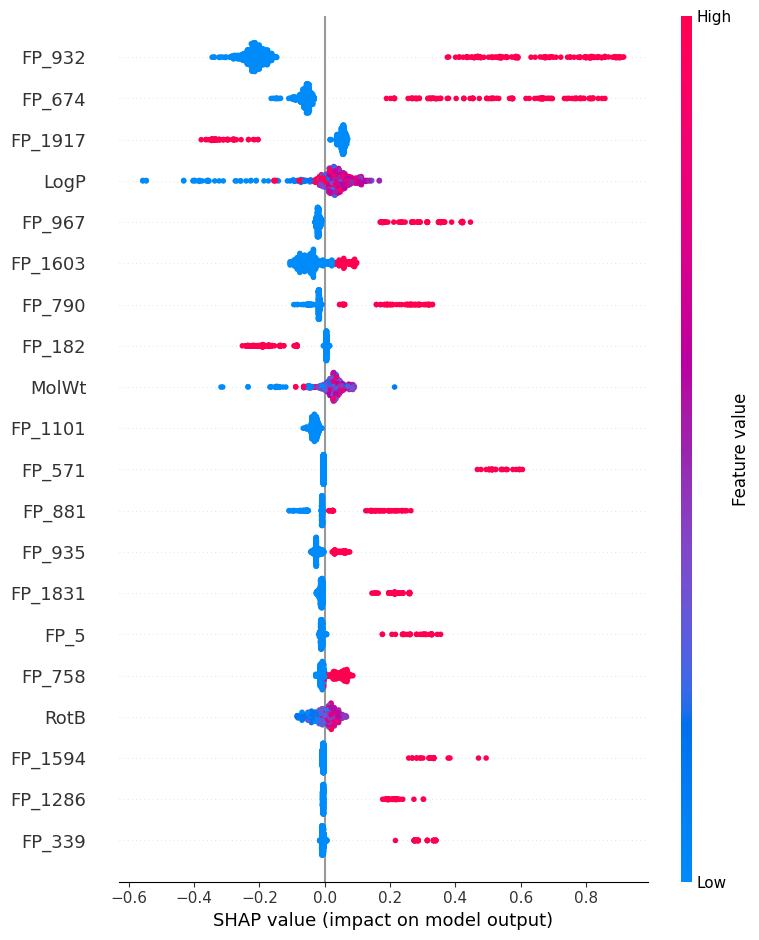

In [85]:
shap.summary_plot(
    shap_values,
    X_test_h,
    feature_names = (
        [f"FP_{i}" for i in range(2048)] + desc_cols
    ),
    max_display=20
)


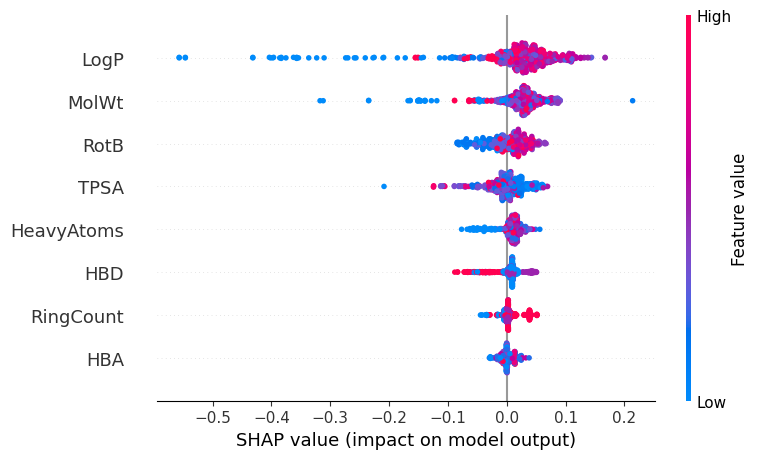

In [86]:
shap.summary_plot(
    shap_values[:, -len(desc_cols):],
    X_test_h[:, -len(desc_cols):],
    feature_names=desc_cols
)


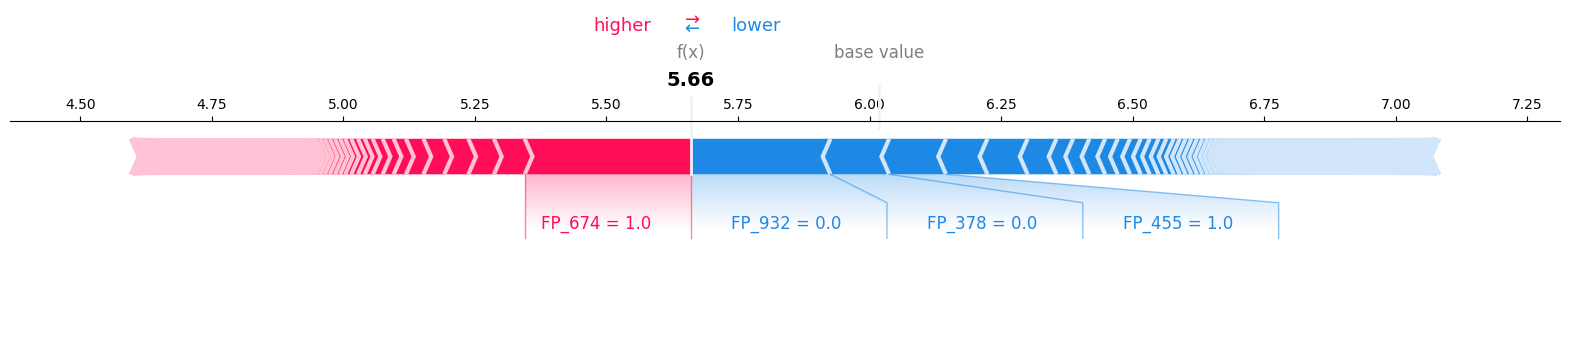

In [87]:
i = 0 # Define 'i' to select the first data point
shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test_h[i],
    feature_names = (
        [f"FP_{j}" for j in range(2048)] + desc_cols
    ),
    matplotlib=True
)

In [88]:
fucoxanthin_smiles = "COc1cc(c2C(=O)C[C@@H](c3ccccc3)Oc2c1)O"
#bir alg üzerinde dene

In [89]:
from rdkit import Chem

fucox_mol = Chem.MolFromSmiles(fucoxanthin_smiles)

if fucox_mol is None:
    raise ValueError("Fucoxanthin SMILES geçersiz")


In [90]:
fucox_fp = morgan_gen.GetFingerprint(fucox_mol)
fucox_fp = np.array(fucox_fp)


In [91]:
fucox_desc = calc_descriptors(fucox_mol)
fucox_desc_df = pd.DataFrame([fucox_desc], columns=desc_cols)

fucox_desc_scaled = scaler.transform(fucox_desc_df)


In [92]:
X_fucox = np.hstack([fucox_fp, fucox_desc_scaled[0]])
X_fucox.shape


(2056,)

In [93]:
pred_pIC50 = xgb_hybrid.predict([X_fucox])[0]
pred_pIC50
#sonuç yakın

np.float32(5.354393)

In [94]:
pred_IC50_M = 10 ** (-pred_pIC50)
pred_IC50_nM = pred_IC50_M * 1e9

pred_pIC50, pred_IC50_nM


(np.float32(5.354393), np.float32(4421.8804))

deneme

In [102]:
#test setindeki moleküllerin indeksleri
test_fps = df.loc[test_idx, "fingerprint"].tolist()

len(test_fps)


619

In [103]:
from rdkit import DataStructs
import numpy as np

n_test = len(test_fps)

tanimoto_matrix = np.zeros((n_test, n_test))

for i in range(n_test):
    for j in range(n_test):
        tanimoto_matrix[i, j] = DataStructs.TanimotoSimilarity(
            test_fps[i],
            test_fps[j]
        )

tanimoto_matrix.shape


(619, 619)

In [104]:
tanimoto_matrix.min(), tanimoto_matrix.max()


(np.float64(0.012048192771084338), np.float64(1.0))

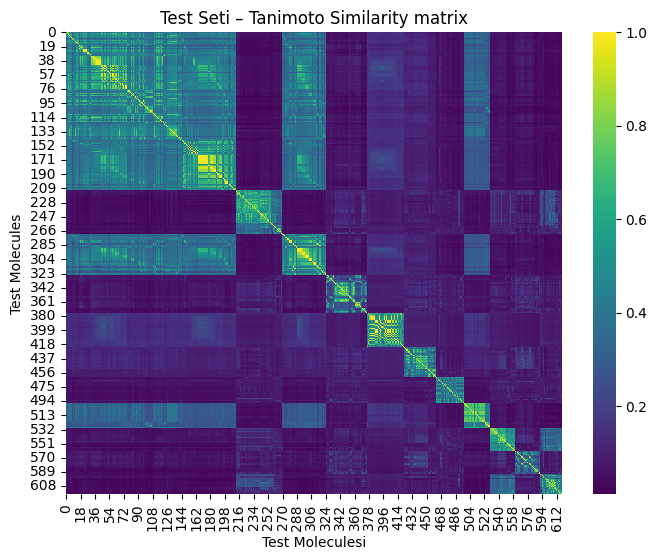

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(tanimoto_matrix, cmap="viridis")
plt.title("Test Seti – Tanimoto Similarity matrix")
plt.xlabel("Test Moleculesi")
plt.ylabel("Test Molecules")
plt.show()


In [106]:
from rdkit import DataStructs
import numpy as np

test_fps = df.loc[test_idx, "fingerprint"].tolist()
test_activity = df.loc[test_idx, "pIC50"].values

n_test = len(test_fps)


In [107]:
sali_matrix = np.zeros((n_test, n_test))

for i in range(n_test):
    for j in range(n_test):
        if i == j:
            sali_matrix[i, j] = 0.0
        else:
            tanimoto = DataStructs.TanimotoSimilarity(
                test_fps[i],
                test_fps[j]
            )

            # Sayısal stabilite
            if tanimoto < 1.0:
                sali_matrix[i, j] = abs(
                    test_activity[i] - test_activity[j]
                ) / (1.0 - tanimoto)
            else:
                sali_matrix[i, j] = np.nan


In [108]:
np.nanmin(sali_matrix), np.nanmax(sali_matrix)


(np.float64(0.0), np.float64(140.98861155247516))

In [109]:
# Üst üçgeni al (çift tekrarını önlemek için)
sali_pairs = []

for i in range(n_test):
    for j in range(i + 1, n_test):
        sali_pairs.append({
            "Mol_i": i,
            "Mol_j": j,
            "pIC50_i": test_activity[i],
            "pIC50_j": test_activity[j],
            "Tanimoto": DataStructs.TanimotoSimilarity(
                test_fps[i],
                test_fps[j]
            ),
            "SALI": sali_matrix[i, j]
        })

sali_df = pd.DataFrame(sali_pairs)
sali_df.sort_values("SALI", ascending=False).head(10)


,Mol_i,Mol_j,pIC50_i,pIC50_j,Tanimoto,SALI
137645,291,294,5.046000,8.045757,0.978723,140.988612
137643,291,292,5.046000,7.920819,0.978723,135.116491
136989,289,293,7.301030,4.921000,0.978723,111.861405
137317,290,293,7.301030,4.921000,0.978723,111.861405
23361,39,40,7.056011,5.824001,0.981132,65.296515
23363,39,42,7.056011,5.824001,0.981132,65.296515
26823,45,49,5.292000,6.638008,0.978261,61.916363
165857,393,405,6.096910,4.677781,0.975610,58.184302
165856,393,404,6.096910,4.677781,0.975610,58.184302
26825,45,51,5.292000,6.398005,0.978261,50.876237


In [110]:
sali_mean = sali_df["SALI"].mean()
sali_std  = sali_df["SALI"].std()

sali_mean, sali_std


(np.float64(1.893592477595215), 1.735535521399184)

In [111]:
threshold_2std = sali_mean + 2 * sali_std
threshold_3std = sali_mean + 3 * sali_std

threshold_2std, threshold_3std


(np.float64(5.3646635203935835), np.float64(7.100199041792767))

In [112]:
sali_df["cliff_2std"] = sali_df["SALI"] > threshold_2std
sali_df["cliff_3std"] = sali_df["SALI"] > threshold_3std


In [113]:
n_cliff_2std = sali_df["cliff_2std"].sum()
n_cliff_3std = sali_df["cliff_3std"].sum()

n_cliff_2std, n_cliff_3std


(np.int64(6167), np.int64(1743))

In [114]:
cliff_df = (
    sali_df[sali_df["cliff_2std"]]
    .sort_values("SALI", ascending=False)
    .reset_index(drop=True)
)

cliff_df.head(10)


,Mol_i,Mol_j,pIC50_i,pIC50_j,Tanimoto,SALI,cliff_2std,cliff_3std
0,291,294,5.046000,8.045757,0.978723,140.988612,True,True
1,291,292,5.046000,7.920819,0.978723,135.116491,True,True
2,290,293,7.301030,4.921000,0.978723,111.861405,True,True
3,289,293,7.301030,4.921000,0.978723,111.861405,True,True
4,39,40,7.056011,5.824001,0.981132,65.296515,True,True
5,39,42,7.056011,5.824001,0.981132,65.296515,True,True
6,45,49,5.292000,6.638008,0.978261,61.916363,True,True
7,393,405,6.096910,4.677781,0.975610,58.184302,True,True
8,393,404,6.096910,4.677781,0.975610,58.184302,True,True
9,45,51,5.292000,6.398005,0.978261,50.876237,True,True


In [115]:
cliff_df_3std = (
    sali_df[sali_df["cliff_3std"]]
    .sort_values("SALI", ascending=False)
    .reset_index(drop=True)
)

cliff_df_3std.head(10)


,Mol_i,Mol_j,pIC50_i,pIC50_j,Tanimoto,SALI,cliff_2std,cliff_3std
0,291,294,5.046000,8.045757,0.978723,140.988612,True,True
1,291,292,5.046000,7.920819,0.978723,135.116491,True,True
2,290,293,7.301030,4.921000,0.978723,111.861405,True,True
3,289,293,7.301030,4.921000,0.978723,111.861405,True,True
4,39,40,7.056011,5.824001,0.981132,65.296515,True,True
5,39,42,7.056011,5.824001,0.981132,65.296515,True,True
6,45,49,5.292000,6.638008,0.978261,61.916363,True,True
7,393,404,6.096910,4.677781,0.975610,58.184302,True,True
8,393,405,6.096910,4.677781,0.975610,58.184302,True,True
9,45,51,5.292000,6.398005,0.978261,50.876237,True,True


In [116]:
cliff_df["Smiles_i"] = df.loc[test_idx, "Smiles"].values[cliff_df["Mol_i"]]
cliff_df["Smiles_j"] = df.loc[test_idx, "Smiles"].values[cliff_df["Mol_j"]]

cliff_df[["Smiles_i", "Smiles_j", "Tanimoto", "SALI"]].head()


,Smiles_i,Smiles_j,Tanimoto,SALI
0,CCCCCC[C@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,CCCCC[C@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,0.978723,140.988612
1,CCCCCC[C@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,CCCCC[C@@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,0.978723,135.116491
2,CCCCCCCC[C@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,CCCCC[C@@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,0.978723,111.861405
3,CCCCCCCC[C@@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,CCCCC[C@@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,0.978723,111.861405
4,CCCCCC(=O)O[C@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)...,CCCCCCC(=O)O[C@@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=...,0.981132,65.296515


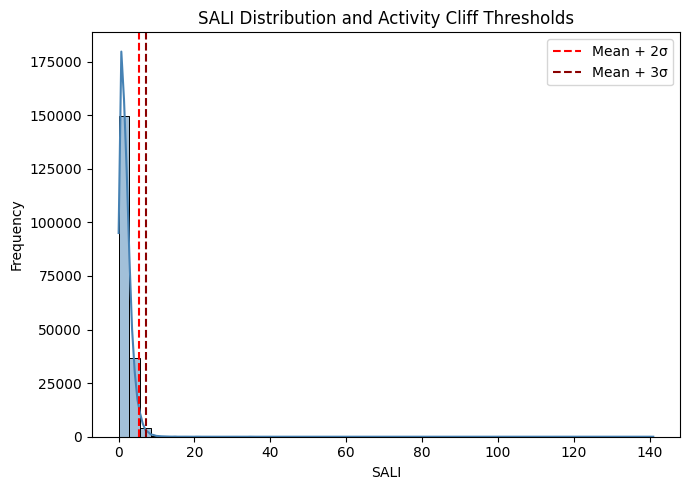

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))

sns.histplot(
    sali_df["SALI"],
    bins=50,
    kde=True,
    color="steelblue"
)

plt.axvline(threshold_2std, color="red", linestyle="--", label="Mean + 2σ")
plt.axvline(threshold_3std, color="darkred", linestyle="--", label="Mean + 3σ")

plt.xlabel("SALI")
plt.ylabel("Frequency")
plt.title("SALI Distribution and Activity Cliff Thresholds")
plt.legend()
plt.tight_layout()
plt.show()


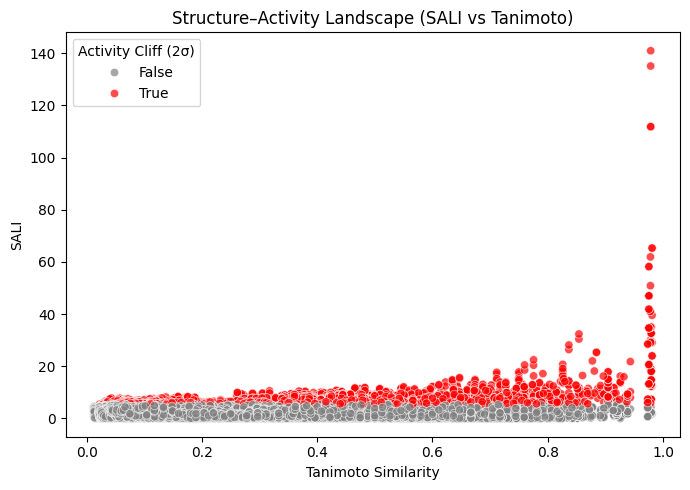

In [118]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data=sali_df,
    x="Tanimoto",
    y="SALI",
    hue="cliff_2std",
    palette={True: "red", False: "gray"},
    alpha=0.7
)

plt.xlabel("Tanimoto Similarity")
plt.ylabel("SALI")
plt.title("Structure–Activity Landscape (SALI vs Tanimoto)")
plt.legend(title="Activity Cliff (2σ)")
plt.tight_layout()
plt.show()


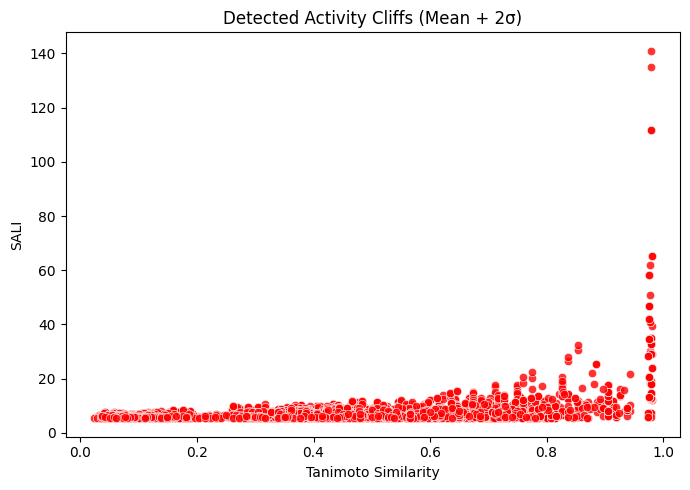

In [119]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data=sali_df[sali_df["cliff_2std"]],
    x="Tanimoto",
    y="SALI",
    color="red",
    alpha=0.8
)

plt.xlabel("Tanimoto Similarity")
plt.ylabel("SALI")
plt.title("Detected Activity Cliffs (Mean + 2σ)")
plt.tight_layout()
plt.show()


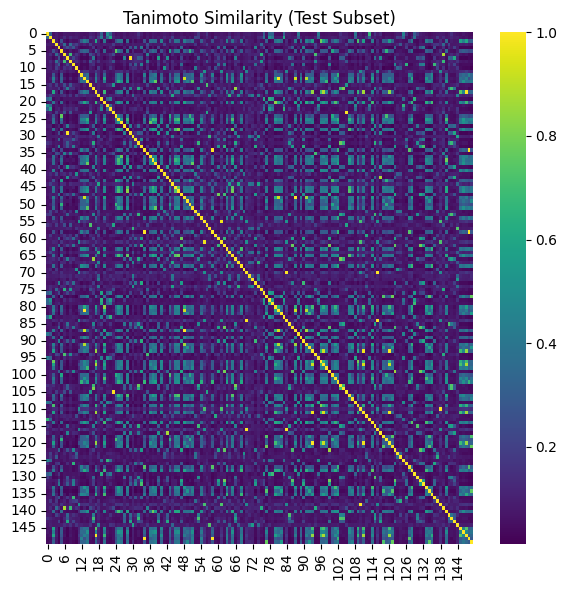

In [120]:
sub_idx = np.random.choice(
    np.arange(n_test),
    size=150,
    replace=False
)

tanimoto_sub = tanimoto_matrix[np.ix_(sub_idx, sub_idx)]

plt.figure(figsize=(6,6))
sns.heatmap(tanimoto_sub, cmap="viridis", cbar=True)
plt.title("Tanimoto Similarity (Test Subset)")
plt.tight_layout()
plt.show()


<Axes: xlabel='pIC50', ylabel='Count'>

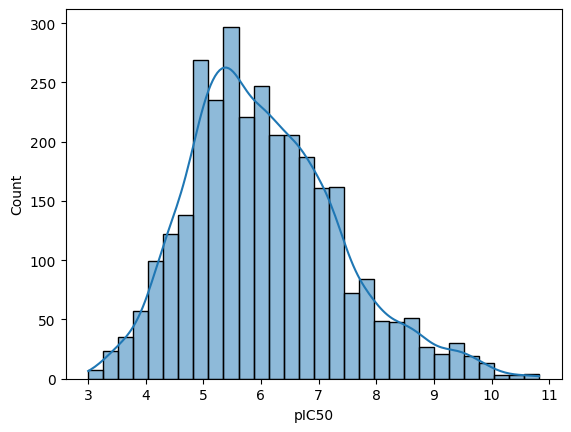

In [121]:
sns.histplot(df["pIC50"], bins=30, kde=True)


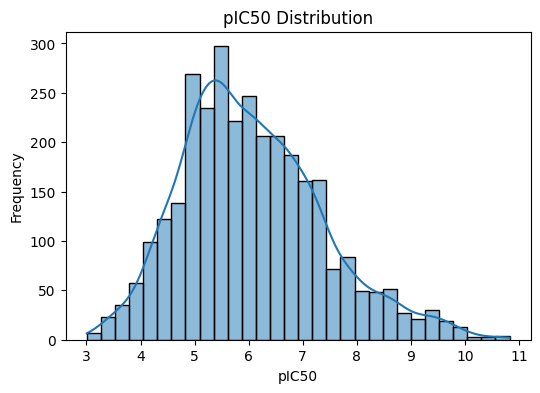

In [122]:
plt.figure(figsize=(6,4))
sns.histplot(df["pIC50"], bins=30, kde=True)

plt.xlabel("pIC50")
plt.ylabel("Frequency")
plt.title("pIC50 Distribution")

plt.savefig("figure1_pIC50_distribution.jpg", dpi=300, bbox_inches="tight")
plt.show()


In [123]:
df["pIC50"].describe()


,pIC50
count,3096.000000
mean,6.068601
std,1.309847
min,3.006123
25%,5.115063
50%,5.926035
75%,6.853996
max,10.823909


In [124]:
len(df)


3096

In [125]:
df["pIC50"].median()


5.9260353883677945

In [126]:
df["pIC50"].std()


1.3098466212505109

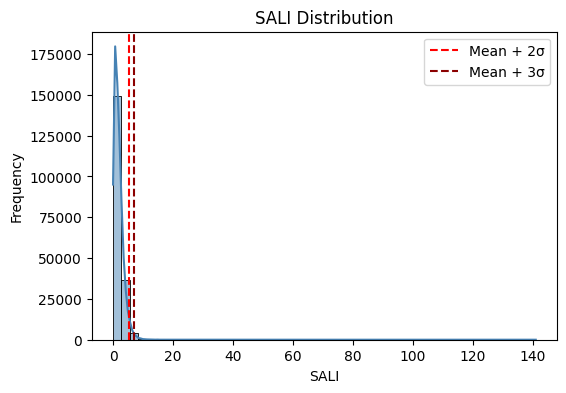

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.histplot(sali_df["SALI"], bins=50, kde=True, color="steelblue")
plt.axvline(threshold_2std, color="red", linestyle="--", label="Mean + 2σ")
plt.axvline(threshold_3std, color="darkred", linestyle="--", label="Mean + 3σ")

plt.xlabel("SALI")
plt.ylabel("Frequency")
plt.title("SALI Distribution")
plt.legend()

plt.savefig("figure2a_sali_histogram.jpg", dpi=300, bbox_inches="tight")
plt.show()


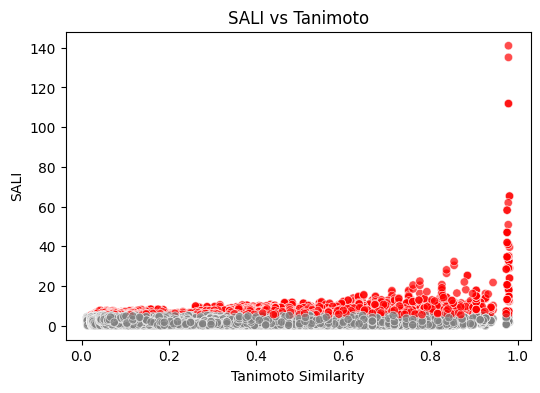

In [128]:
plt.figure(figsize=(6,4))

sns.scatterplot(
    data=sali_df,
    x="Tanimoto",
    y="SALI",
    hue="cliff_2std",
    palette={True: "red", False: "gray"},
    alpha=0.7,
    legend=False
)

plt.xlabel("Tanimoto Similarity")
plt.ylabel("SALI")
plt.title("SALI vs Tanimoto")

plt.savefig("figure2b_sali_vs_tanimoto.jpg", dpi=300, bbox_inches="tight")
plt.show()
